Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

importing Dataset


In [2]:
dataset = pd.read_csv("AirPassengers.csv")
#Parse strings to datetime type
dataset ['Month'] = pd.to_datetime (dataset [ 'Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [3]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


plotting Graph

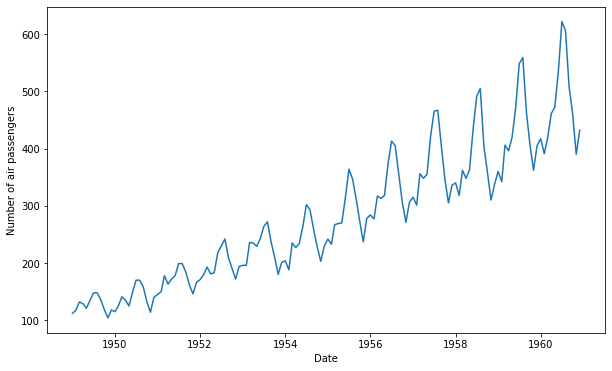

In [4]:

plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

Determing rolling statistics


In [5]:
rolmean = indexedDataset.rolling (window=12).mean()

rolstd = indexedDataset.rolling (window=12).std()
print (rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


Plotting rolling statistics

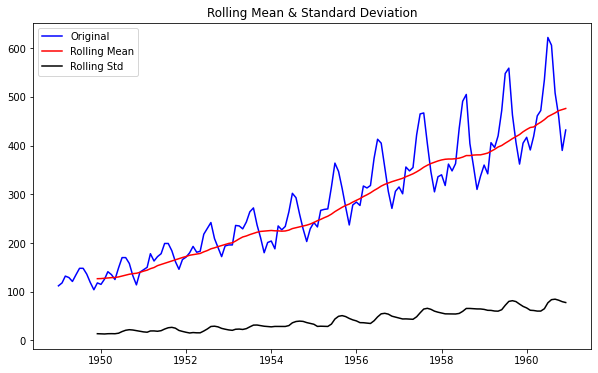

In [6]:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label= 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend (loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Perform Dickey-fuller test

In [7]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller (indexedDataset ['#Passengers'], autolag='AIC')

dfoutput = pd. Series (dftest [0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest [4].items():
  dfoutput['Critical Value (%s) '%key] = value

print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Estimating Trend

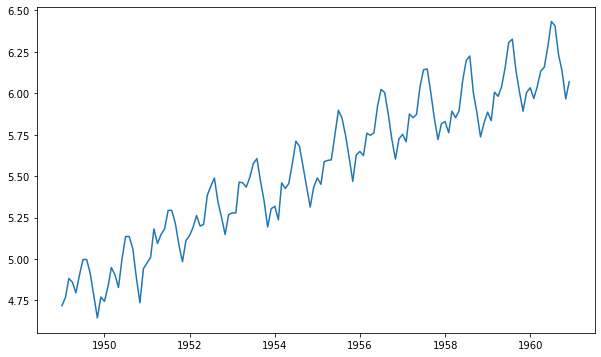

In [8]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


Calculate Moving Average

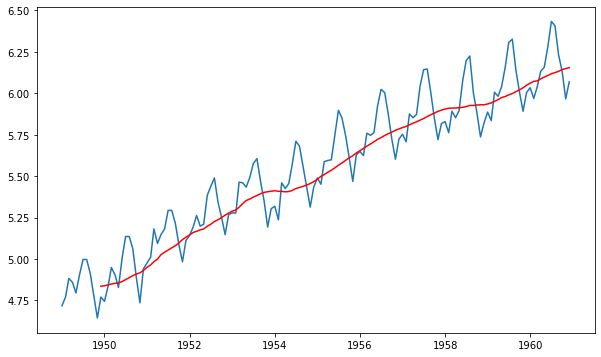

In [9]:

movingAverage = indexedDataset_logScale.rolling (window=12).mean()
movingSTD = indexedDataset_logScale.rolling (window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color="red")

Difference of MA and N.o of passengers + Remove nan values

In [10]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna (inplace=True)
datasetLogScaleMinusMovingAverage.head (10)


,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


ADCF test


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

  #Determing rolling statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()
  
  #Plot rolling statistics:
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot (movingSTD, color='black', label= 'Rolling Std')
  plt.legend (loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller (timeseries ['#Passengers'], autolag='AIC')
  dfoutput = pd.Series(dftest [0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in dftest [4].items():
    dfoutput['Critical Value (%s) '% key] = value
  print (dfoutput)



Test stationarity

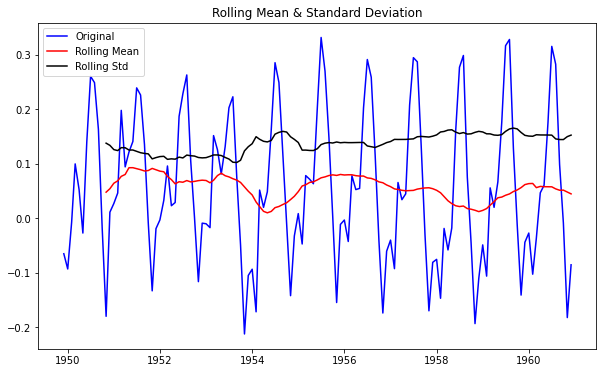

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [12]:
test_stationarity(datasetLogScaleMinusMovingAverage)

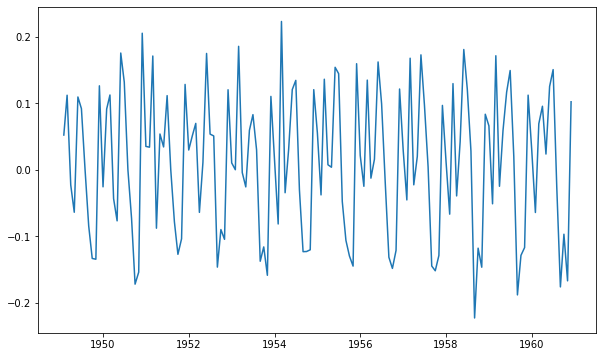

In [13]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

Calc weighted value

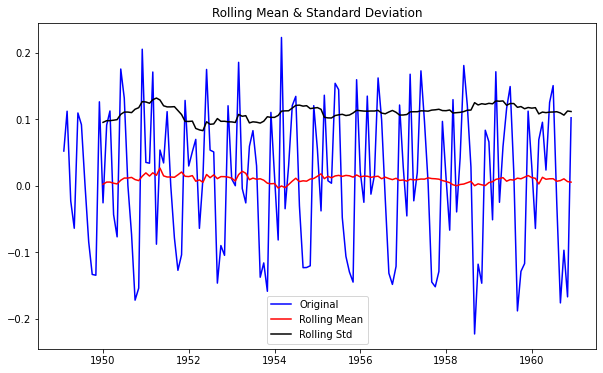

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [14]:
datasetLogDiffShifting.dropna (inplace=True)
test_stationarity (datasetLogDiffShifting)

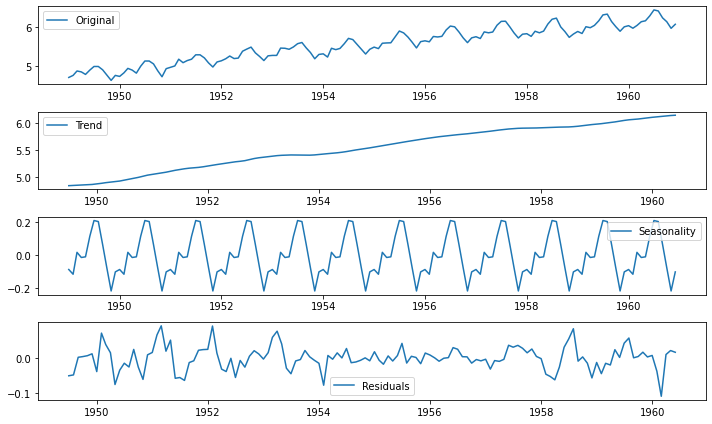

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot (411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend (loc='best')
plt.subplot (412)
plt.plot(trend, label='Trend')
plt.legend (loc='best')
plt.subplot (413)
plt.plot(seasonal, label='Seasonality')
plt.legend (loc='best')
plt.subplot (414)
plt.plot(residual, label='Residuals')
plt.legend (loc='best')
plt.tight_layout()


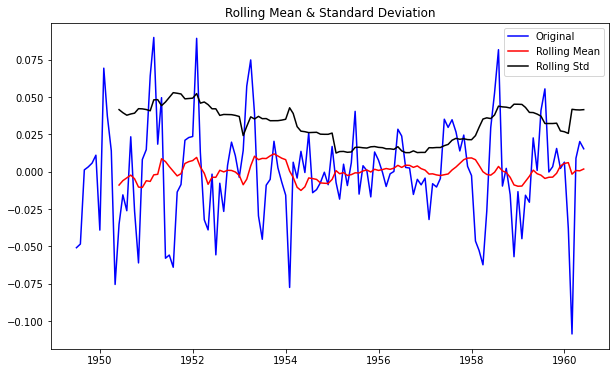

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [16]:
decomposedLogData = residual
decomposedLogData.dropna (inplace=True)
test_stationarity (decomposedLogData)

Plot ACF and PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


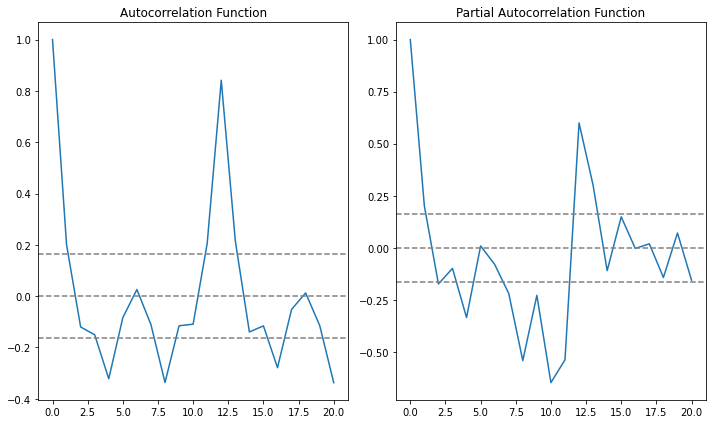

In [17]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#PLot ACF:
plt.subplot (121)
plt.plot(lag_acf)
plt.axhline (y=0, linestyle='--', color='gray')
plt.axhline (y=-1.96/np.sqrt(len (datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline (y=1.96/np.sqrt(len (datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#PLot PACF:
plt.subplot (122)
plt.plot(lag_pacf)
plt.axhline (y=0, linestyle='--', color='gray')
plt.axhline (y=-1.96/np.sqrt(len (datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline (y=1.96/np.sqrt(len (datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

import ARIMA

AR model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


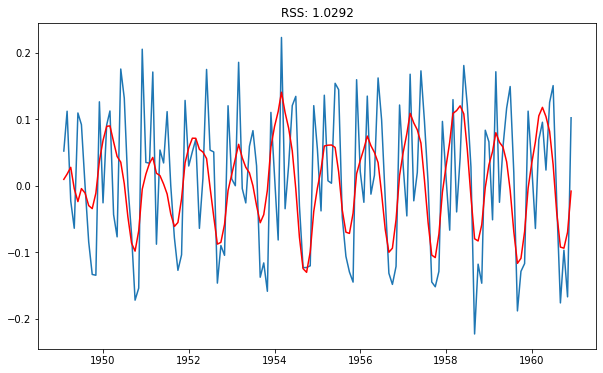

In [18]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL

model = ARIMA (indexedDataset_logScale, order=(2, 1, 2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR. fittedvalues, color="red")
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

MA model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


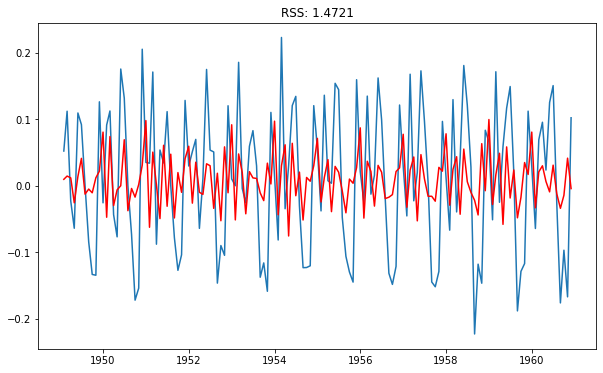

In [19]:
#MA MODEL
model = ARIMA (indexedDataset_logScale, order=(0,1, 2))
results_MA = model.fit (disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

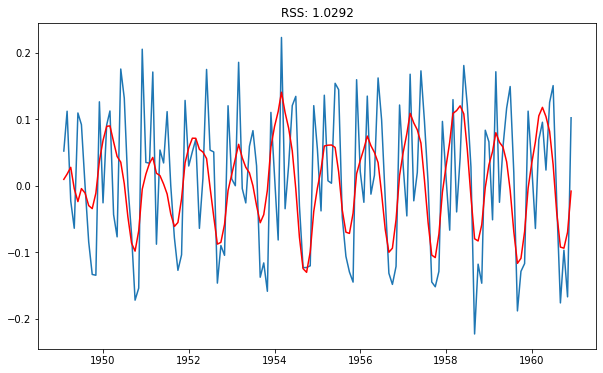

In [20]:
model = ARIMA (indexedDataset_logScale, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA. fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))

In [21]:
predictions_ARIMA_diff = pd. Series (results_ARIMA. fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [22]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [23]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].ix[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

AttributeError: ignored

In [ ]:
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [ ]:
indexedDataset_logScale

In [ ]:
#results_ARIMA.plot_predict(1,264)
x-results ARIMA. forecast (steps-120)

In [ ]:
x[1]

In [ ]:
len(x[1])

In [ ]:
np.exp(x[1])